<a href="https://colab.research.google.com/github/shreeganeshasharma/ParticleSimulations/blob/main/Pure1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#D1 = 1; D2 = 100
___
https://journals.aps.org/pre/supplemental/10.1103/PhysRevE.105.014604
___

#Initialization

In [456]:
#necessary libraries
import time
import math
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
np.random.seed(1541)
#Brownian motion parameters
#Time step
dt = 0.001
#Number of steps
nums = 1000
#Number of particles
nump = 1000
#Boundary between media
R1 = 0.5
#Outer reflecting boundary
R2 = 1
#Diffusivity of inner medium
D1 = 1
#Diffusivity of outer medium
D2 = 100

#Radius of the target at the center
#R = R1/100
"""Get r0 value from paper - Giacomo uses an absorbing boundary at 0"""
R = 0

#Parameters of the normal distribution
mean = 0
covar = 1

#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Random steps
Eps = np.random.normal(mean, covar, (nump, nums))
dX1s = np.sqrt(2*D1*dt)*Eps
dX2s = np.sqrt(2*D2*dt)*Eps

#nump particles starting at init
Init = np.tile(np.array([.2]), nump)

"""Initialize X[0] here - Can't do
Can initialize Y[0][:]
Initialize counts for t=0"""

#Hitting times if the target is hit
hittingTime = np.zeros(nump)

#Simulate Ito Convention

In [457]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      #Remove the particle once it hits the target
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels is presently in medium1 and travels without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is presently traveling in medium2 and travels without crossing the oter boundary
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 1.5659232139587402 seconds ---


#Plot

Mean First Passage Time =  57.13651498335183


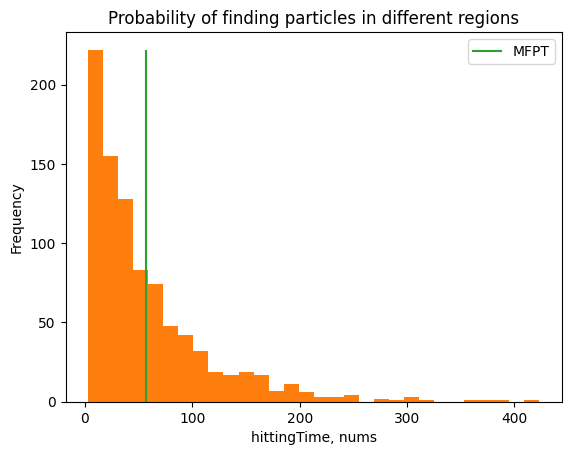

In [458]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

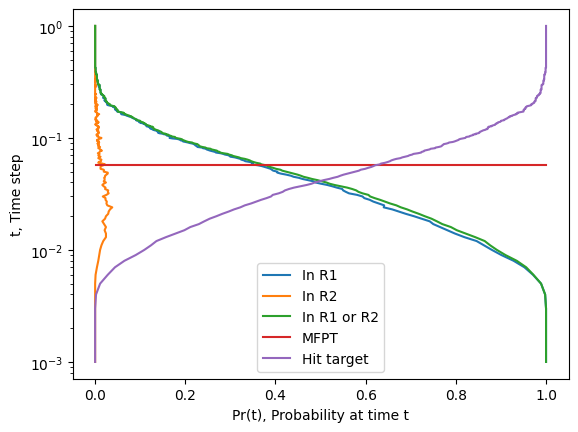

In [459]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

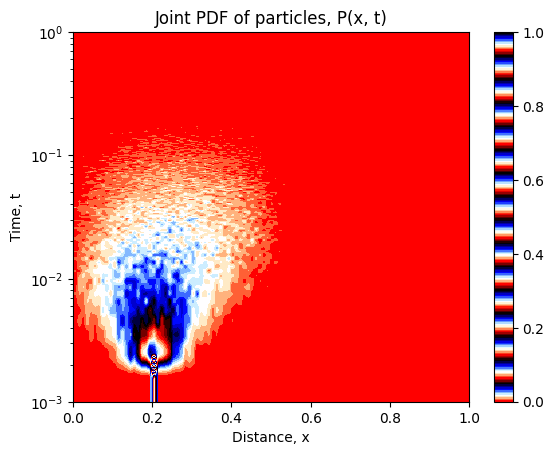

In [460]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

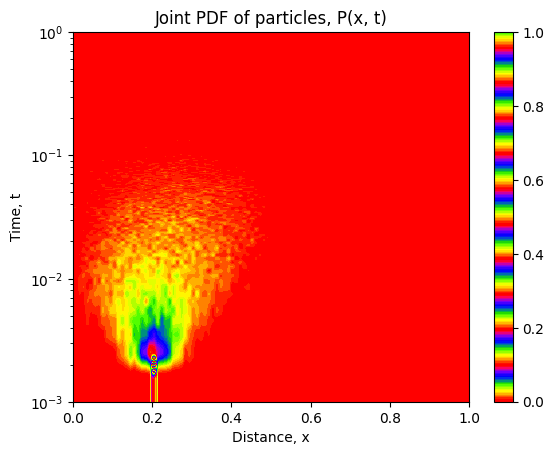

In [461]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [462]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 1.1815576553344727 seconds ---


#Plot

Mean First Passage Time =  60.13879003558719


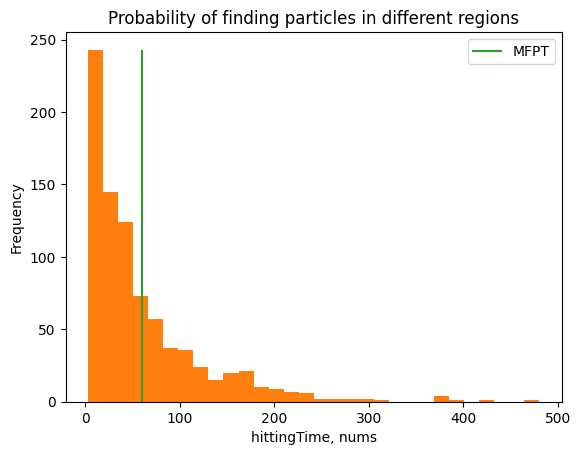

In [463]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

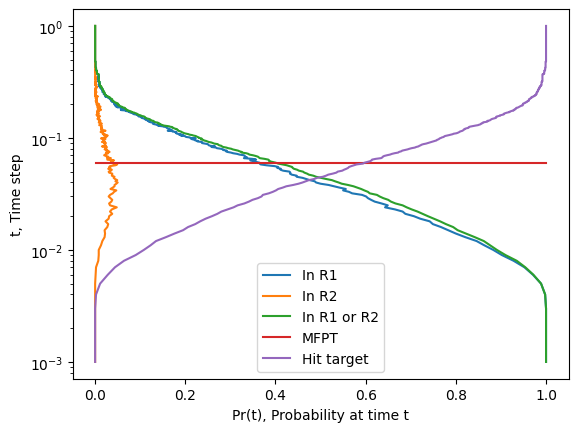

In [464]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

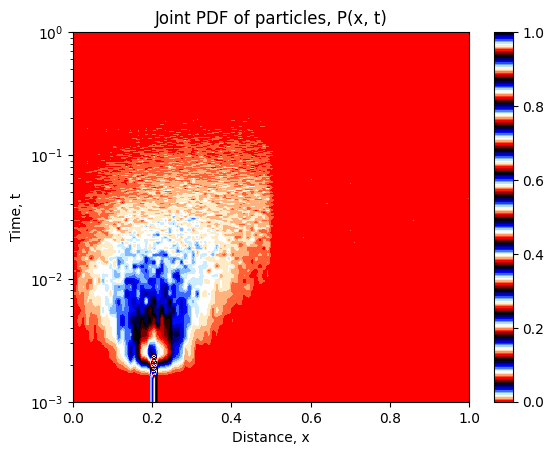

In [465]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

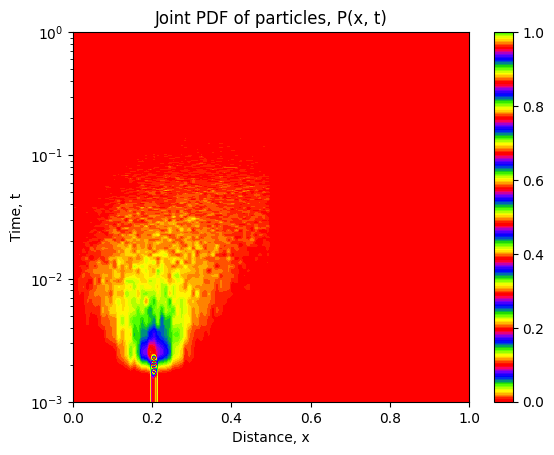

In [466]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [467]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 1.7196707725524902 seconds ---


#Plot

Mean First Passage Time =  49.558673469387756


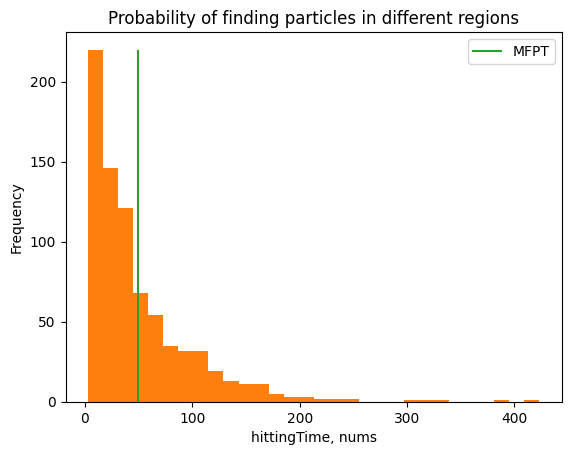

In [468]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

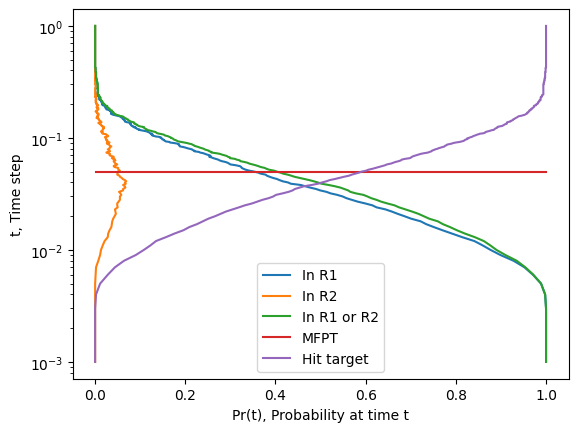

In [469]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

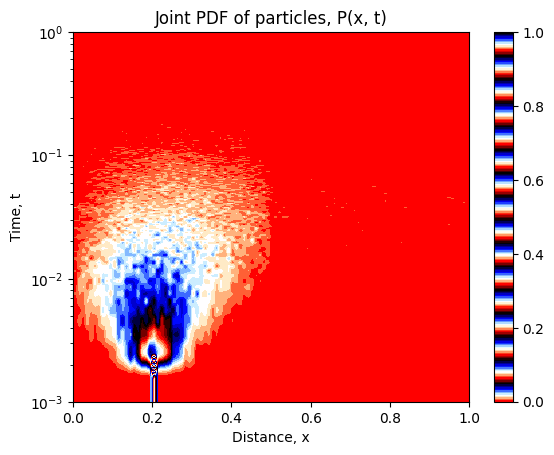

In [470]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

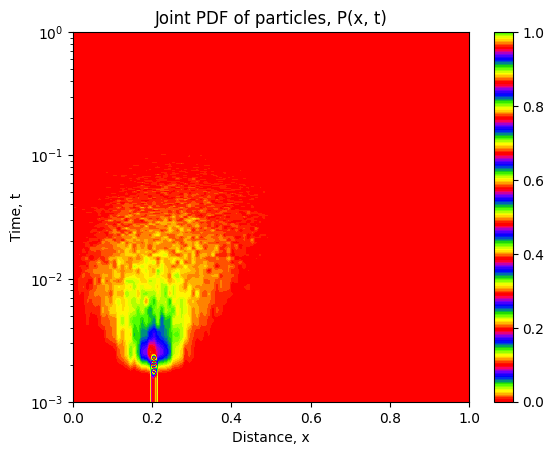

In [471]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 1; D2 = 10
___
___

#Simulate Ito Convention

In [472]:
#Diffusivity of inner medium
D1 = 1
#Diffusivity of outer medium
D2 = 10

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [473]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 1.3676567077636719 seconds ---


#Plot

Mean First Passage Time =  57.13651498335183


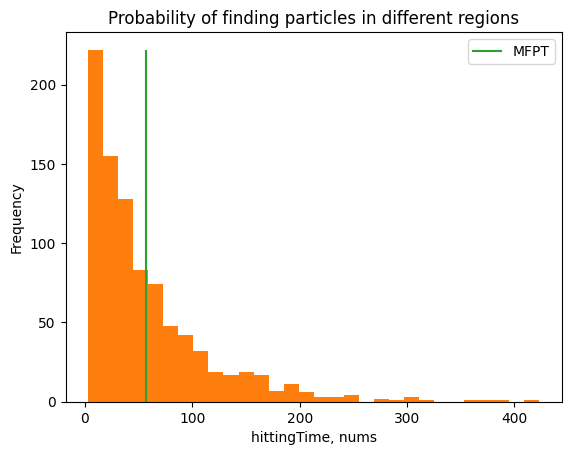

In [474]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

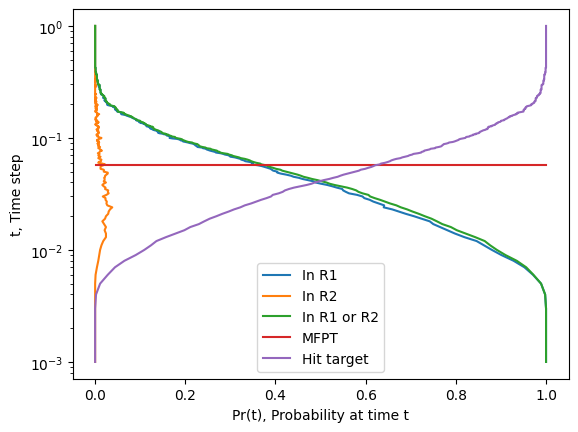

In [475]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

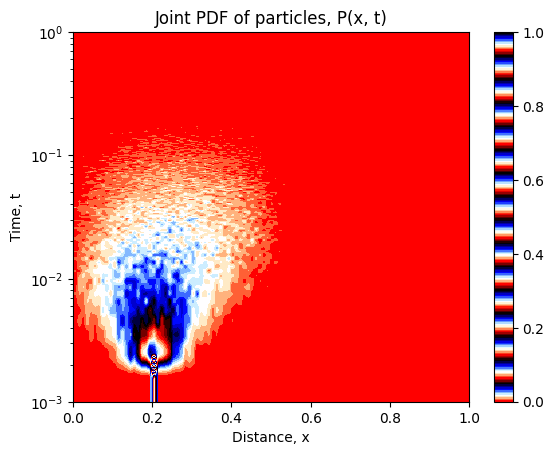

In [476]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

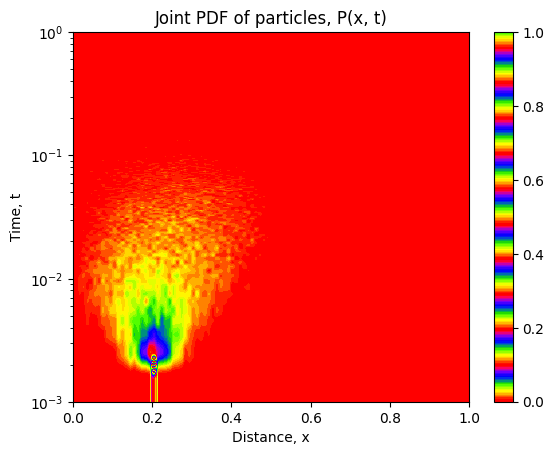

In [477]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [478]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.6141090393066406 seconds ---


#Plot

Mean First Passage Time =  87.94399185336049


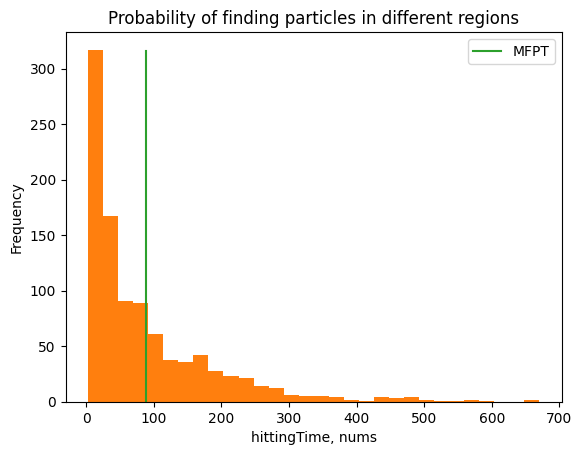

In [479]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

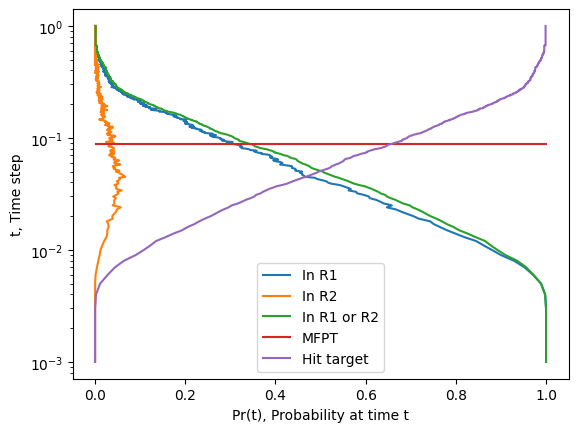

In [480]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

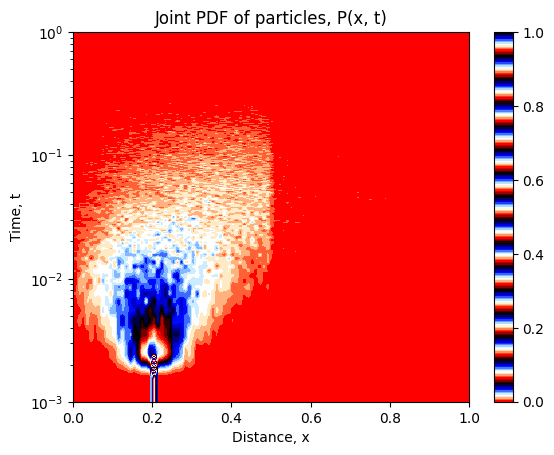

In [481]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

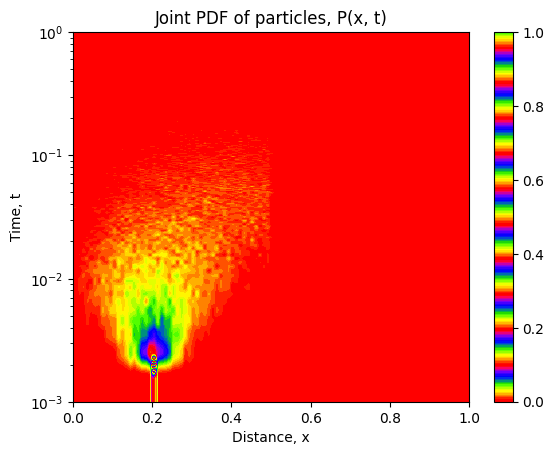

In [482]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [483]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 1.690608263015747 seconds ---


#Plot

Mean First Passage Time =  54.93703703703704


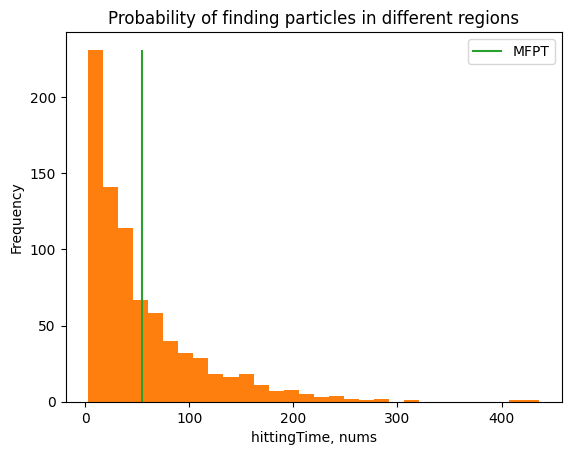

In [484]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

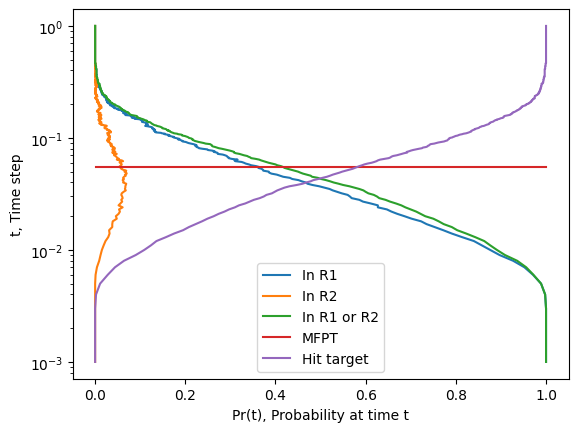

In [485]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

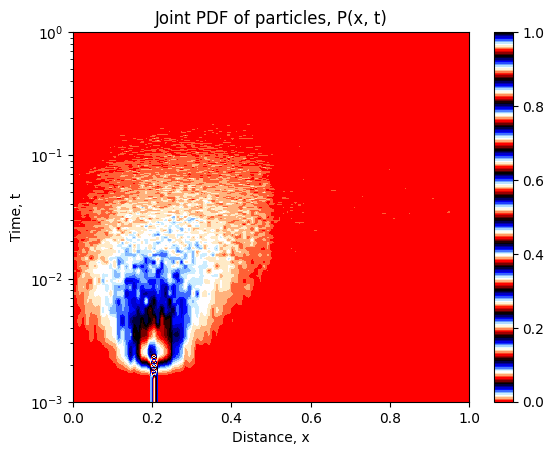

In [486]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

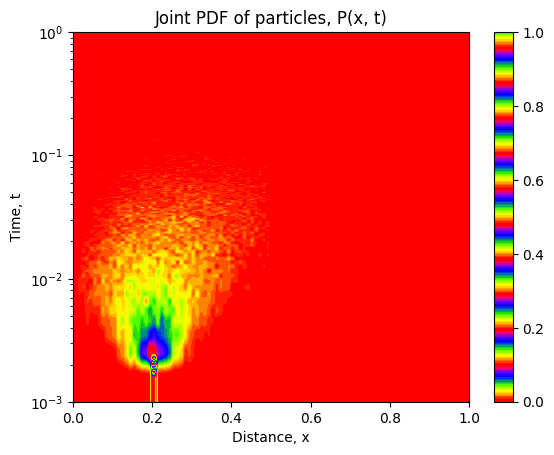

In [487]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 1; D2 = 1.1
___
___

#Simulate Ito Convention

In [488]:
#Diffusivity of inner medium
D1 = 1
#Diffusivity of outer medium
D2 = 1.1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [489]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.8055317401885986 seconds ---


#Plot

Mean First Passage Time =  57.13651498335183


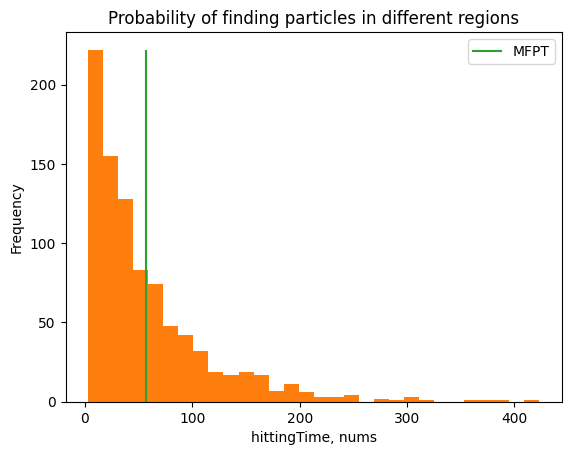

In [490]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

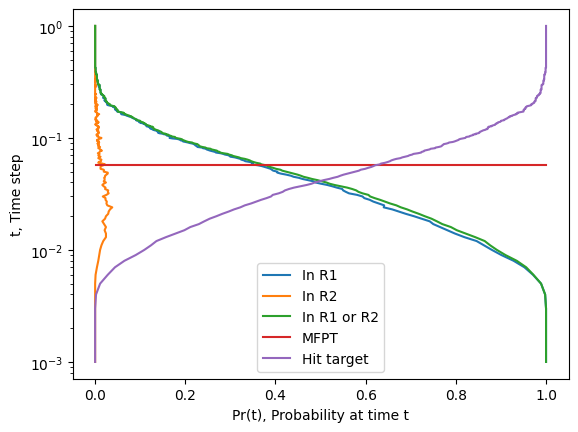

In [491]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

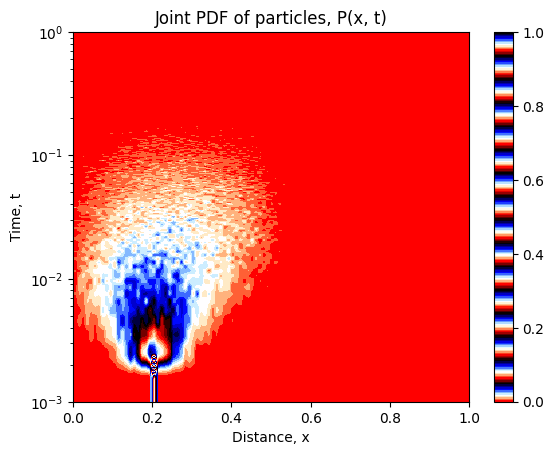

In [492]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

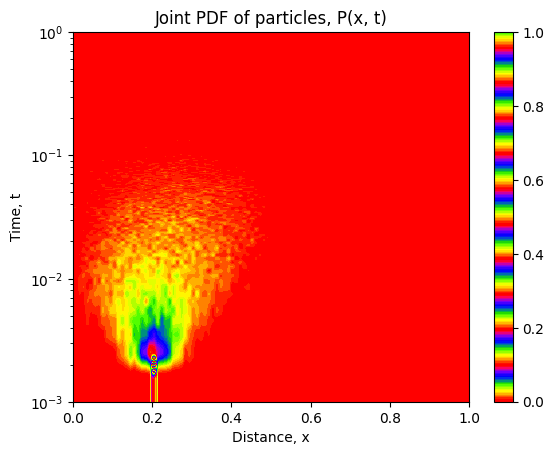

In [493]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [494]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.26539087295532227 seconds ---


#Plot

Mean First Passage Time =  78.03423967774421


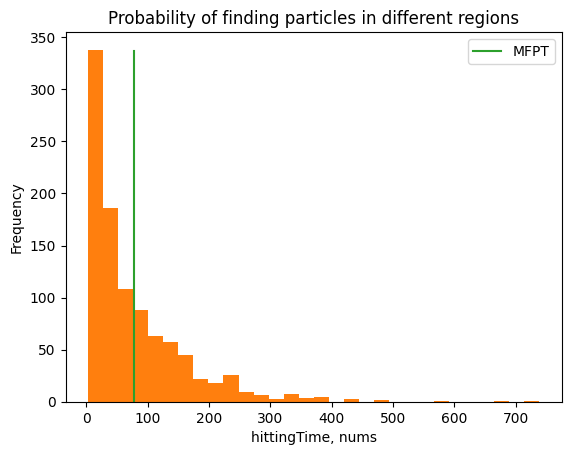

In [495]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

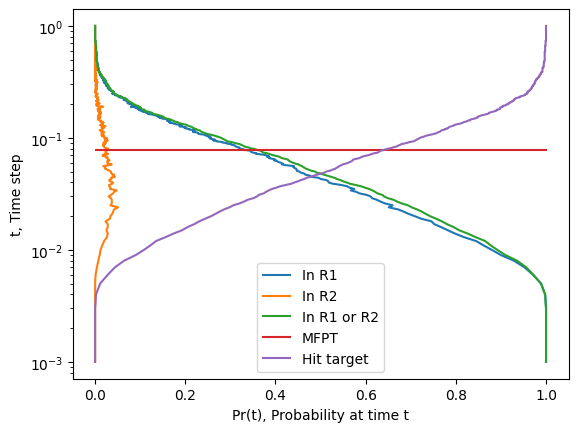

In [496]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

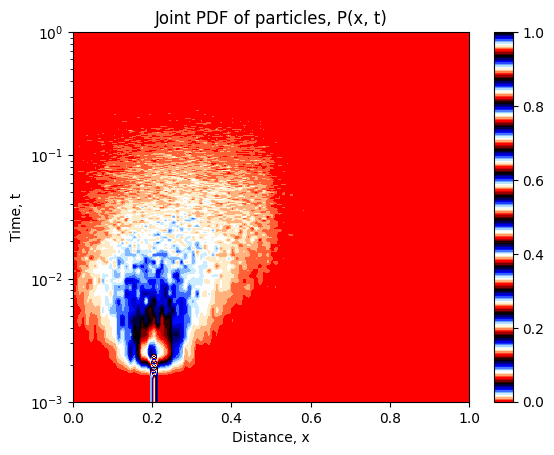

In [497]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

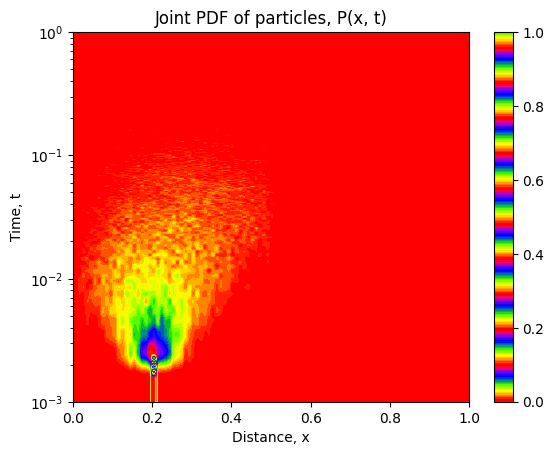

In [498]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [499]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.45656275749206543 seconds ---


#Plot

Mean First Passage Time =  77.05775075987842


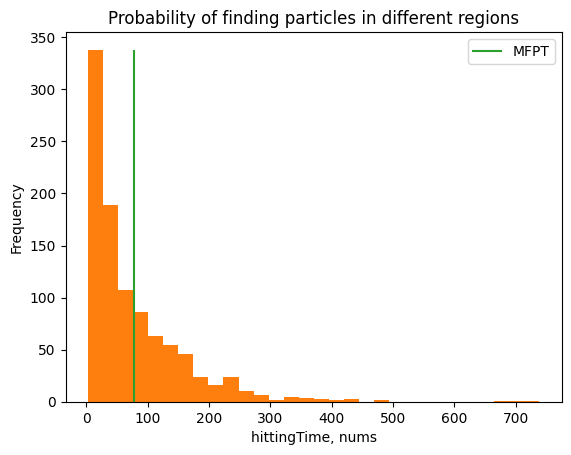

In [500]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

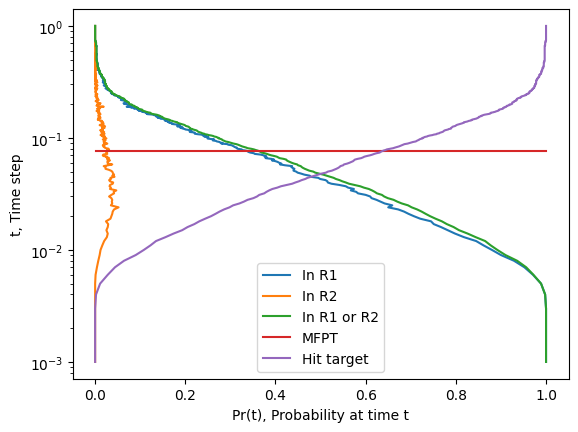

In [501]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

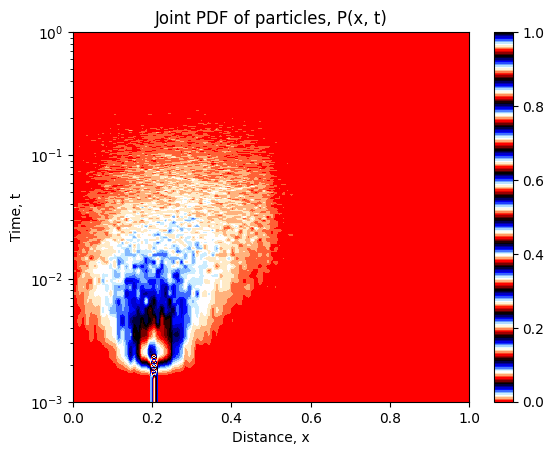

In [502]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

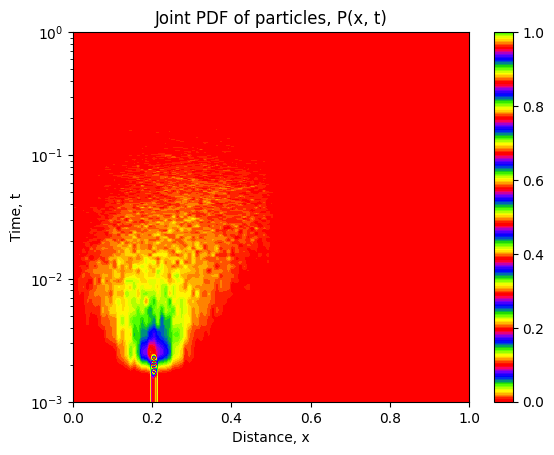

In [503]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 1; D2 = 1
___
___

#Simulate Ito Convention

In [504]:
#Diffusivity of inner medium
D1 = 1
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [505]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.40204453468322754 seconds ---


#Plot

Mean First Passage Time =  57.13651498335183


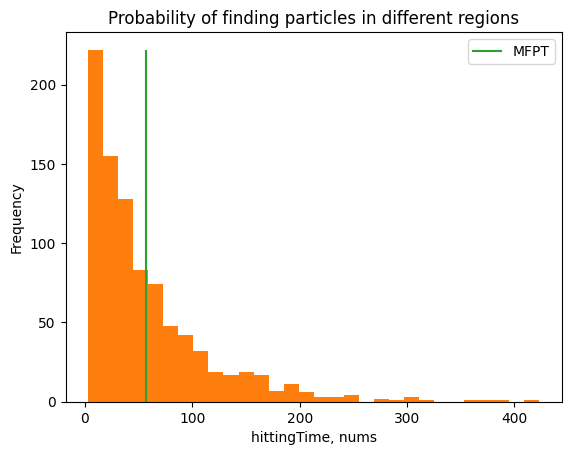

In [506]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

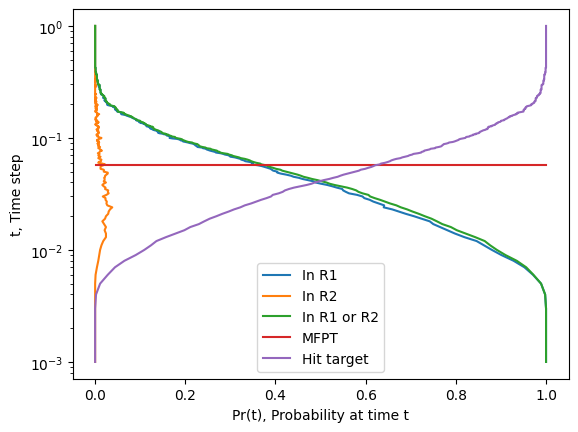

In [507]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

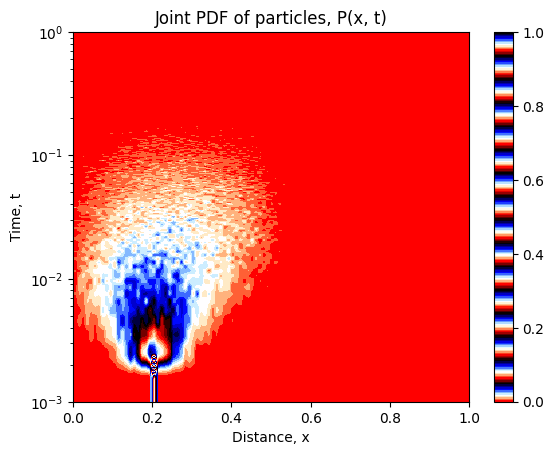

In [508]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

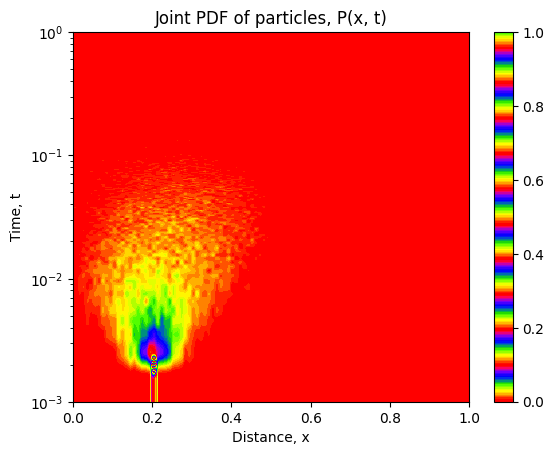

In [509]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [510]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.26509714126586914 seconds ---


#Plot

Mean First Passage Time =  76.51762336354481


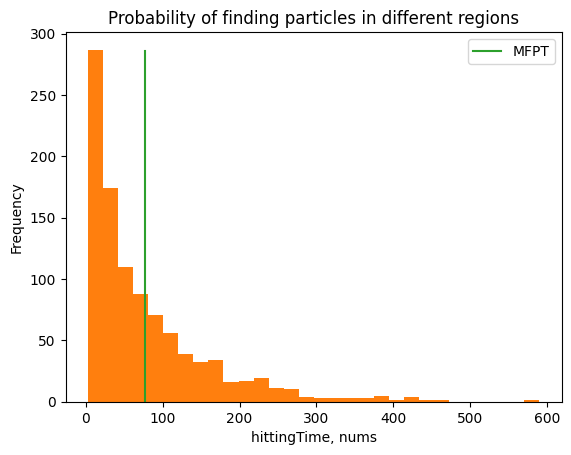

In [511]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

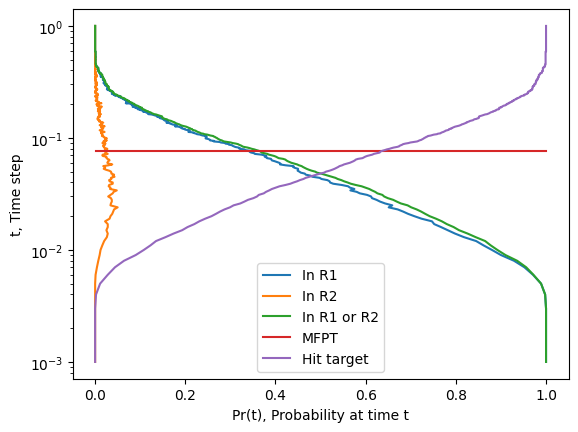

In [512]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

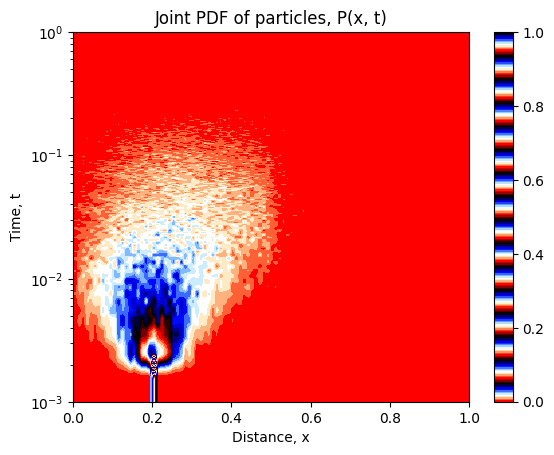

In [513]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

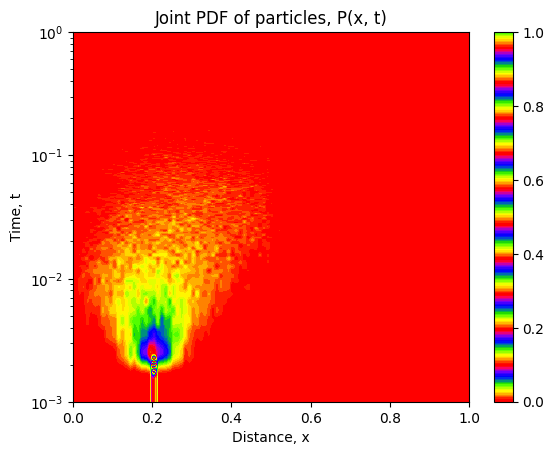

In [514]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [515]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.7922265529632568 seconds ---


#Plot

Mean First Passage Time =  76.51762336354481


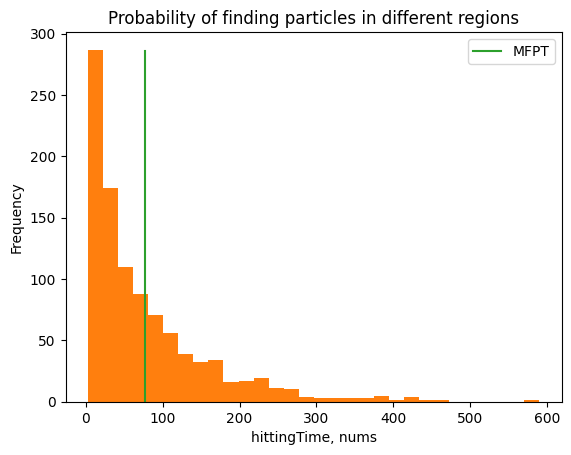

In [516]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

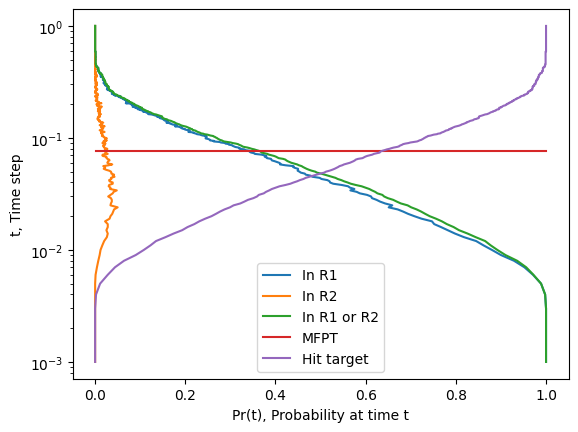

In [517]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

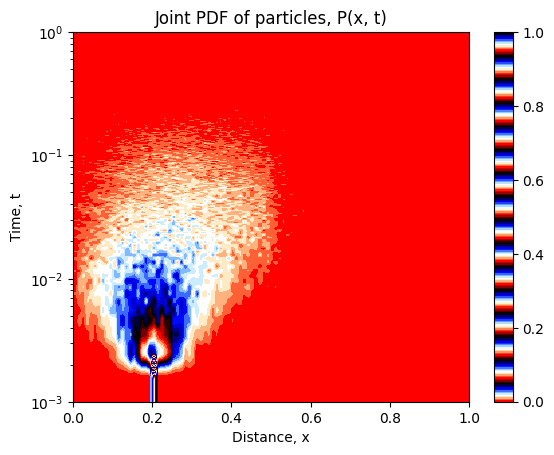

In [518]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

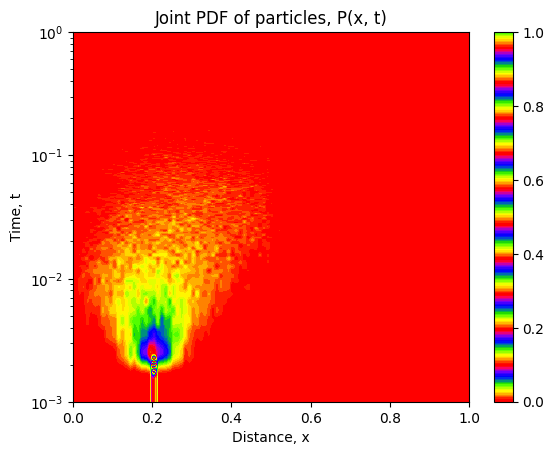

In [519]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 1.1; D2 = 1
___
___

#Simulate Ito Convention

In [520]:
#Diffusivity of inner medium
D1 = 1.1
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [521]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.4335172176361084 seconds ---


#Plot

Mean First Passage Time =  57.13651498335183


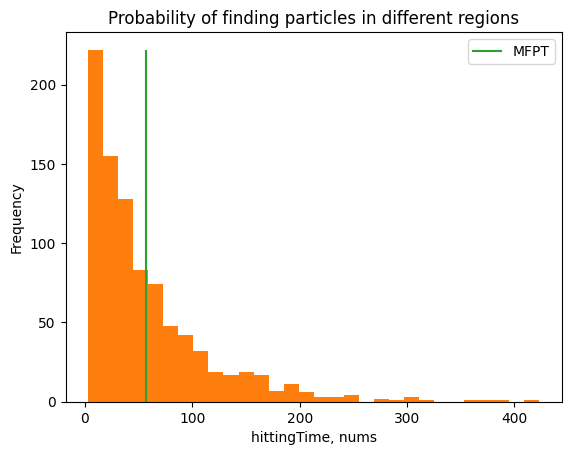

In [522]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

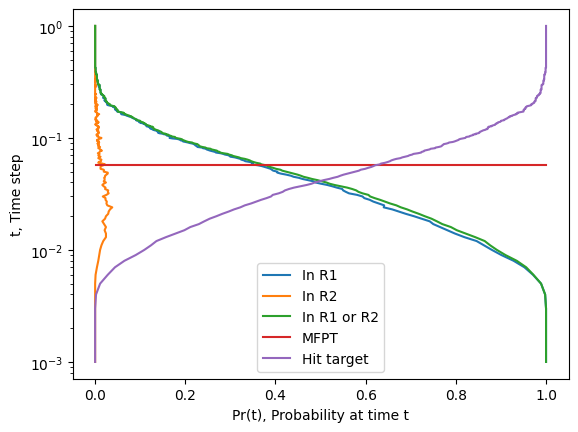

In [523]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

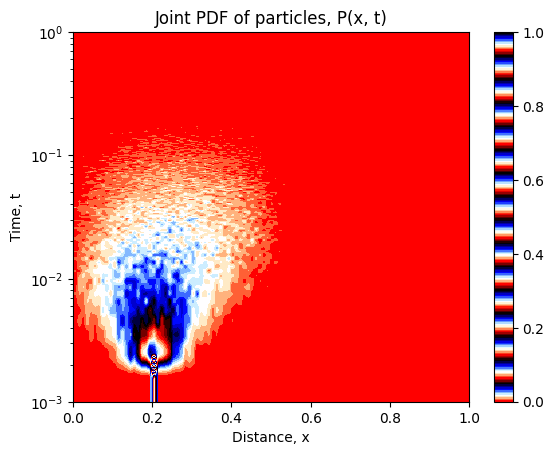

In [524]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

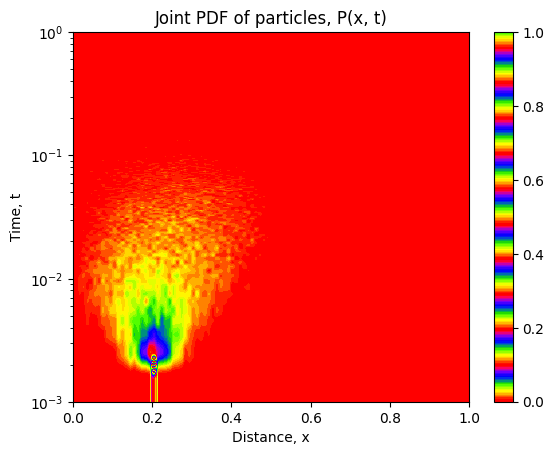

In [525]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [526]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.25914502143859863 seconds ---


#Plot

Mean First Passage Time =  76.46385542168674


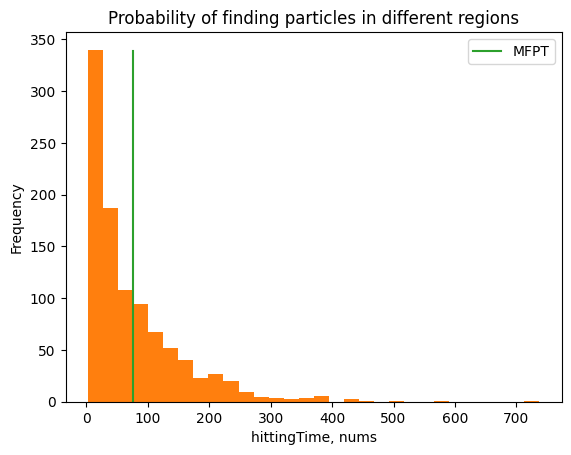

In [527]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

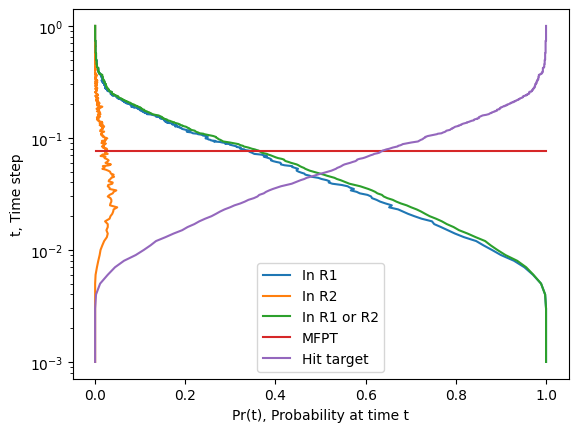

In [528]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

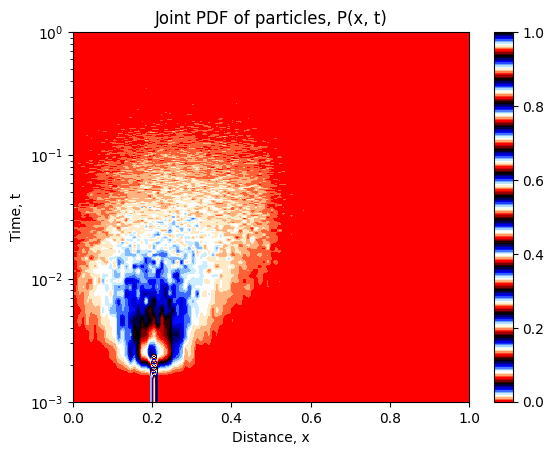

In [529]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

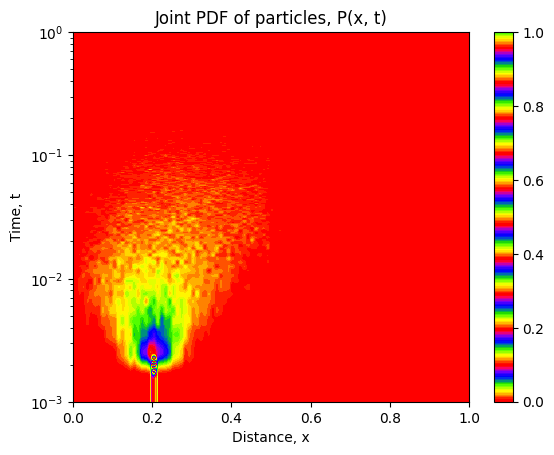

In [530]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [531]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.7391858100891113 seconds ---


#Plot

Mean First Passage Time =  76.99799398194584


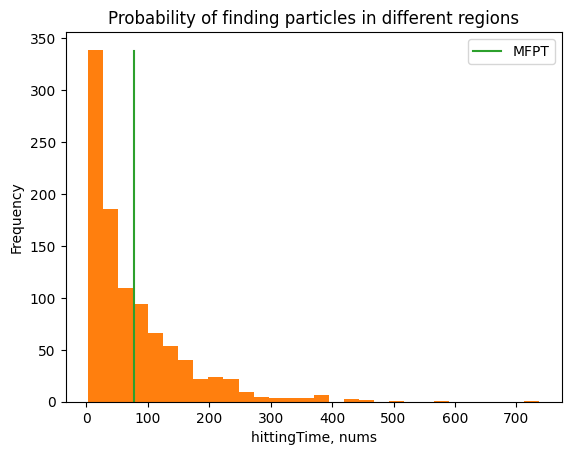

In [532]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

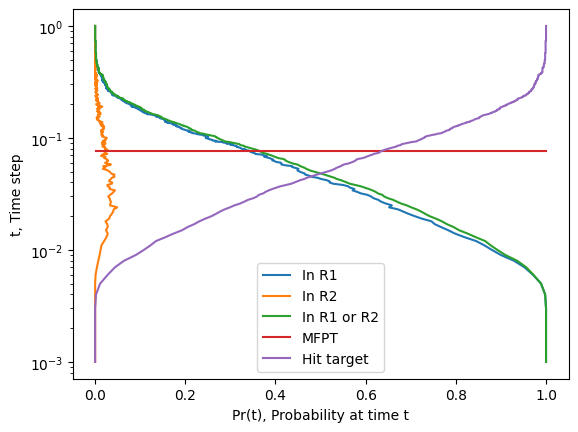

In [533]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

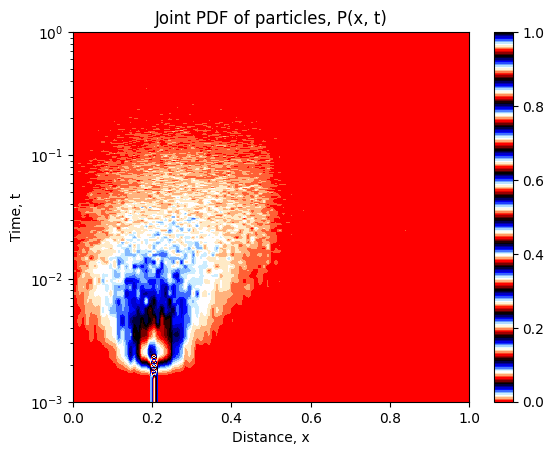

In [534]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

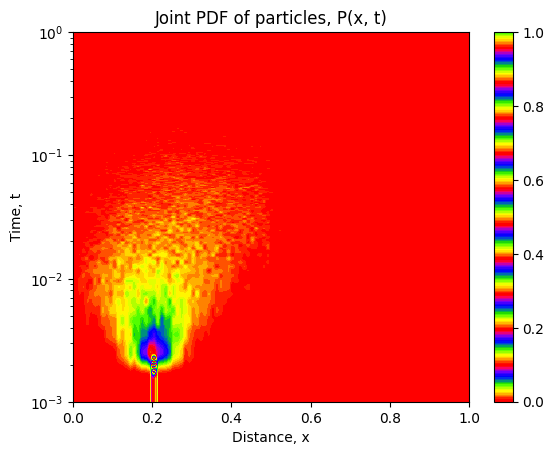

In [535]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 10; D2 = 1
___
___

#Simulate Ito Convention

In [536]:
#Diffusivity of inner medium
D1 = 10
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [537]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.43091440200805664 seconds ---


#Plot

Mean First Passage Time =  57.13651498335183


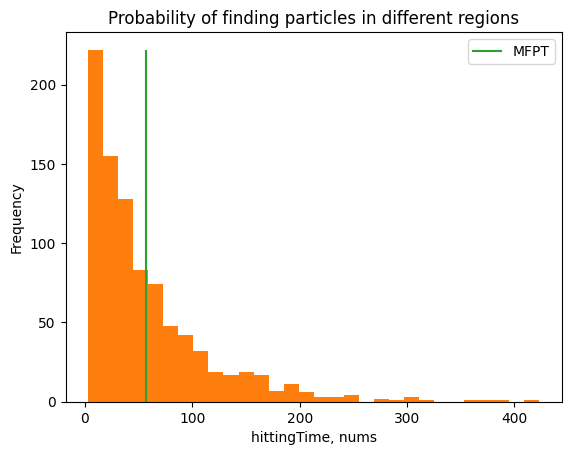

In [538]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

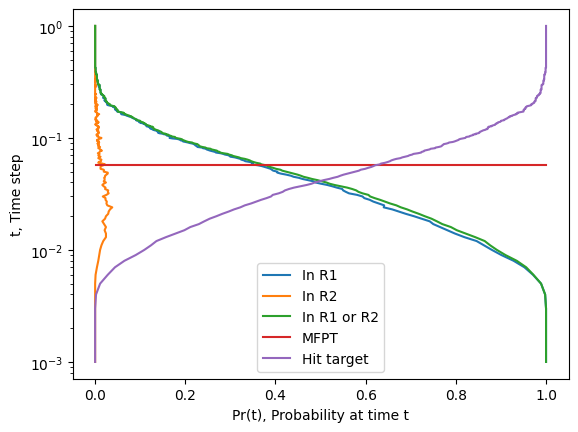

In [539]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

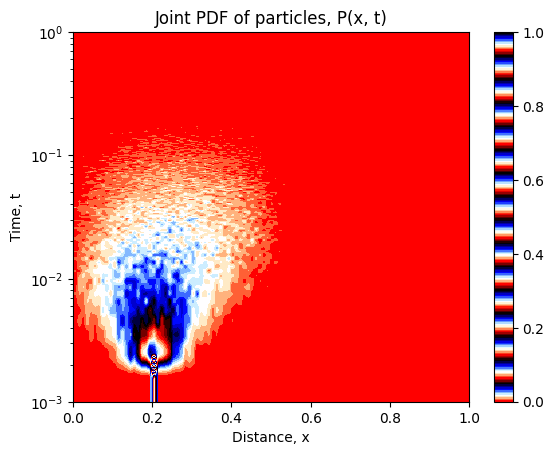

In [540]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

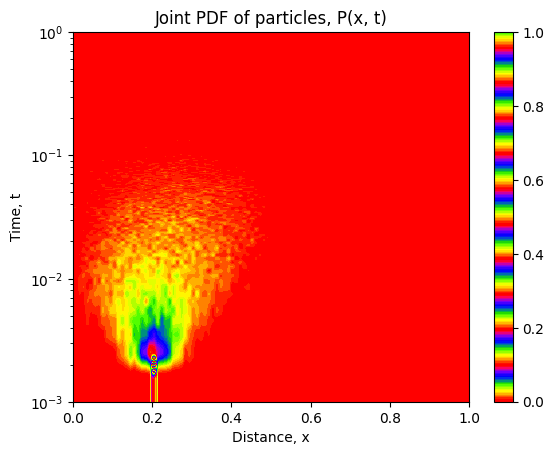

In [541]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [542]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.5336461067199707 seconds ---


#Plot

Mean First Passage Time =  57.80947012401353


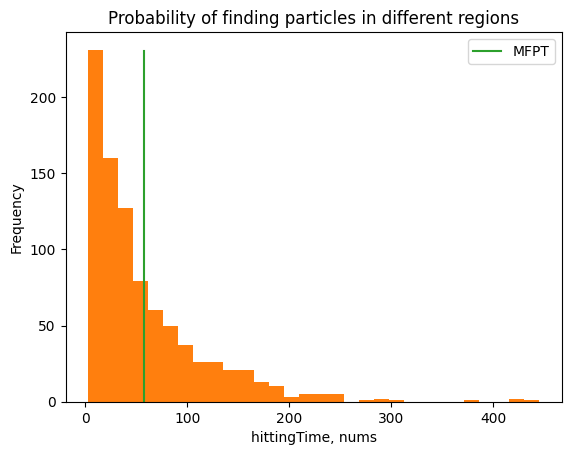

In [543]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

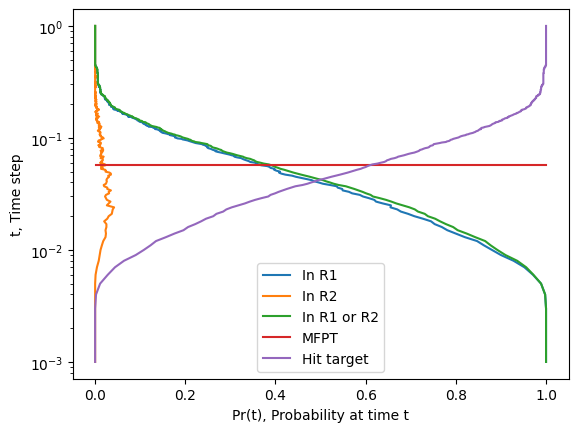

In [544]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

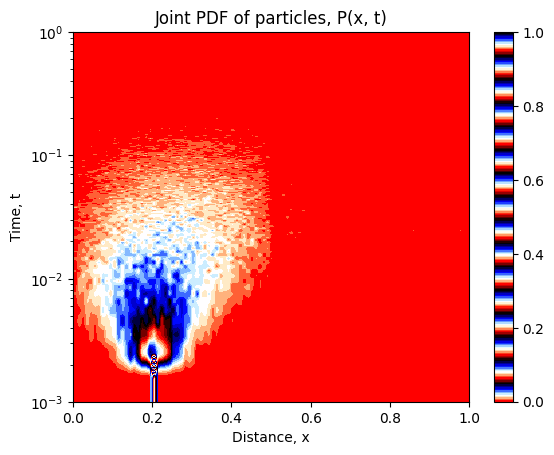

In [545]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

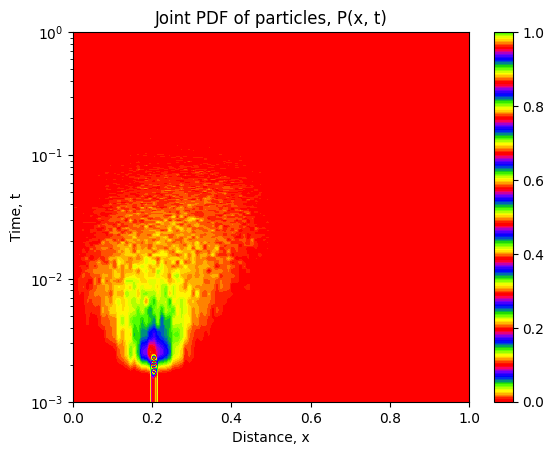

In [546]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [547]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.5716829299926758 seconds ---


#Plot

Mean First Passage Time =  68.12636165577342


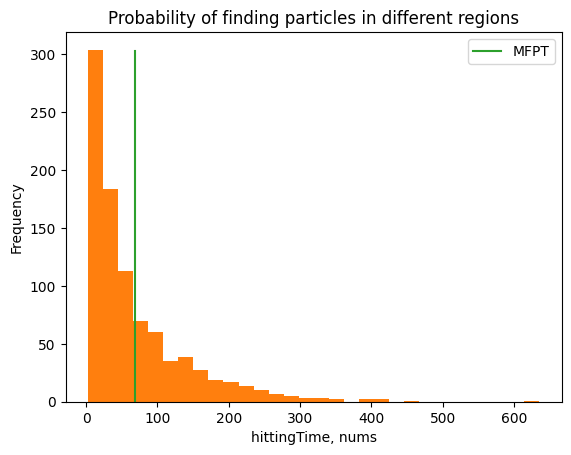

In [548]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

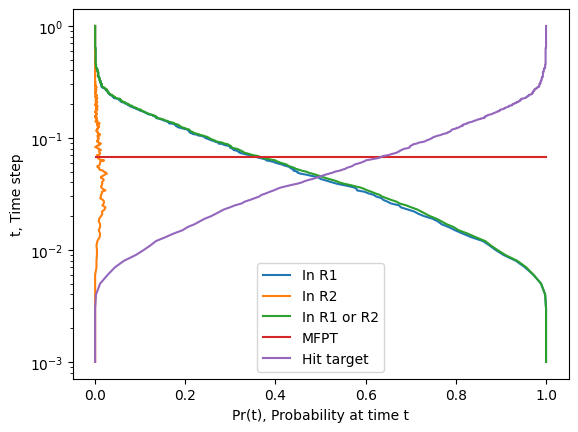

In [549]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

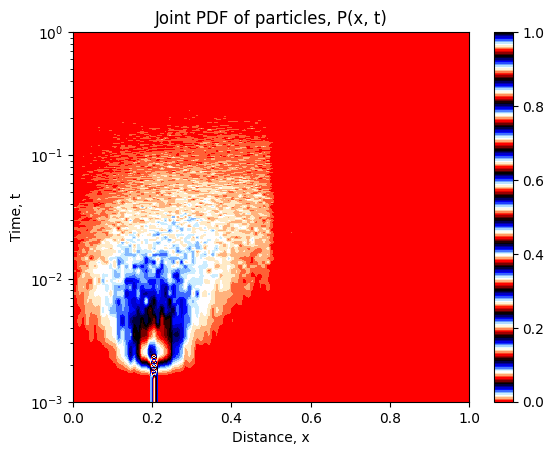

In [550]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

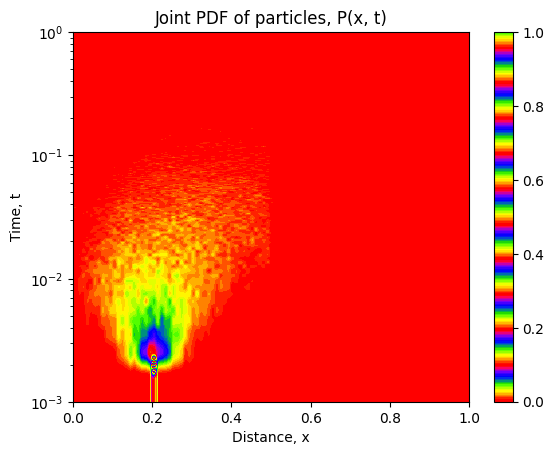

In [551]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 100; D2 = 1
___
___

#Simulate Ito Convention

In [552]:
#Diffusivity of inner medium
D1 = 100
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [553]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.42787599563598633 seconds ---


#Plot

Mean First Passage Time =  57.13651498335183


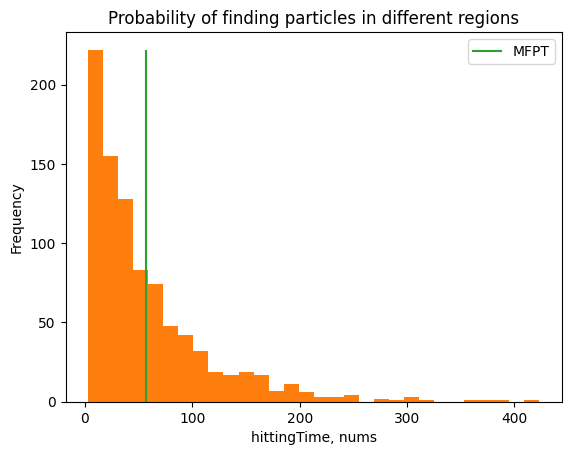

In [554]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

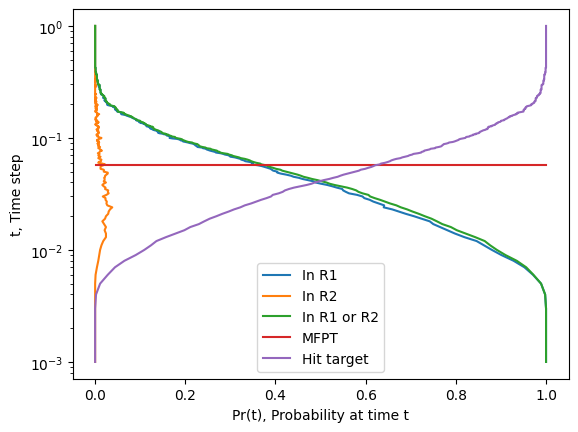

In [555]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

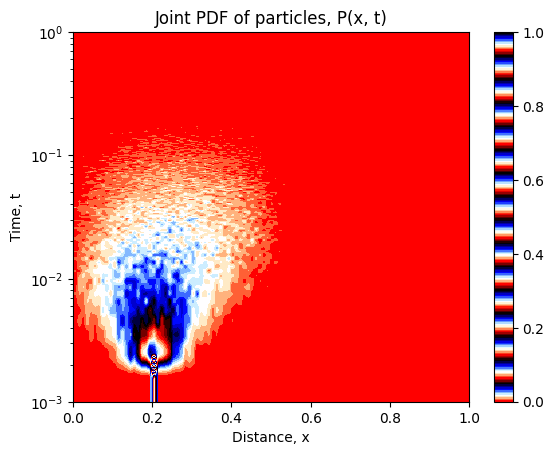

In [556]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

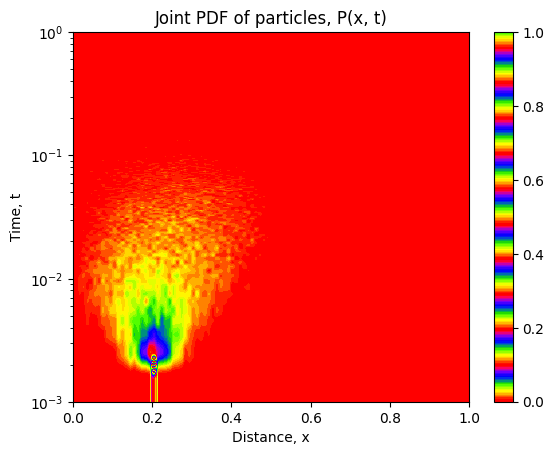

In [557]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [558]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 1.2814555168151855 seconds ---


#Plot

Mean First Passage Time =  47.32238442822384


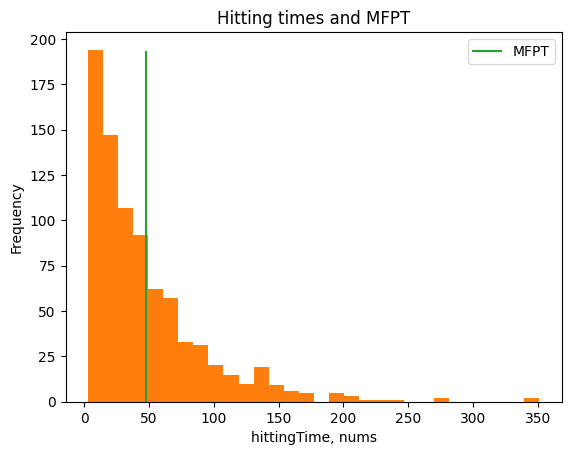

In [559]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()

plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

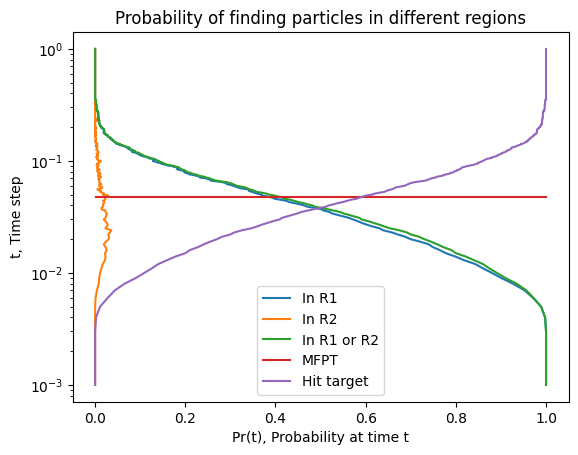

In [560]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

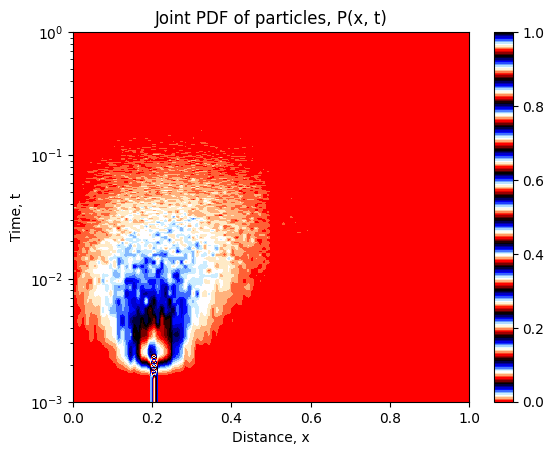

In [561]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

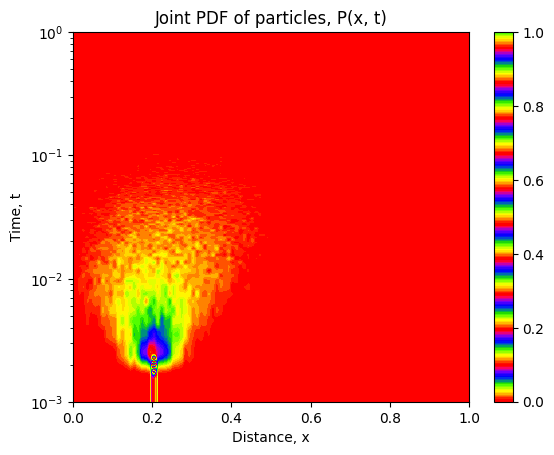

In [562]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [563]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  1000 nums =  1000 --- 0.667137622833252 seconds ---


#Plot

Mean First Passage Time =  70.11567567567567


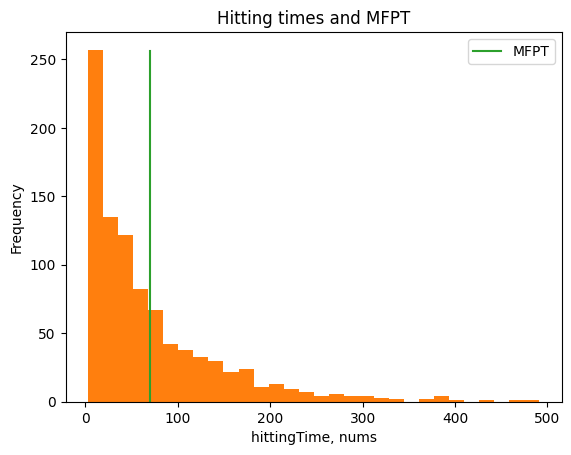

In [564]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()

plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

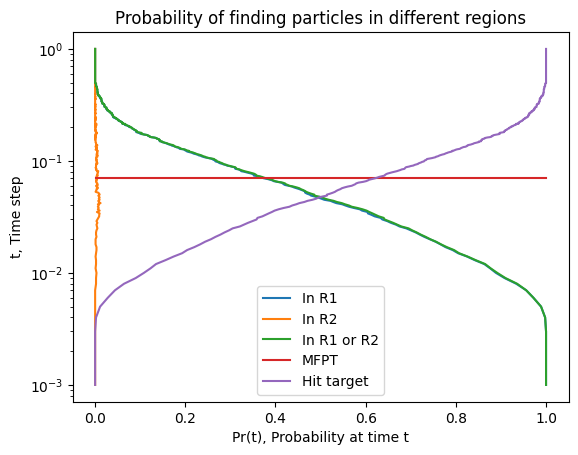

In [565]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

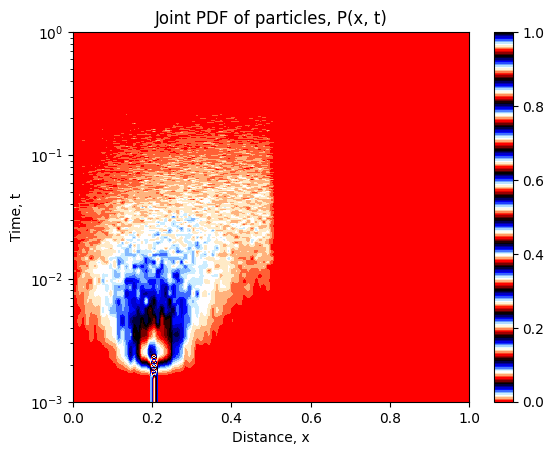

In [566]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

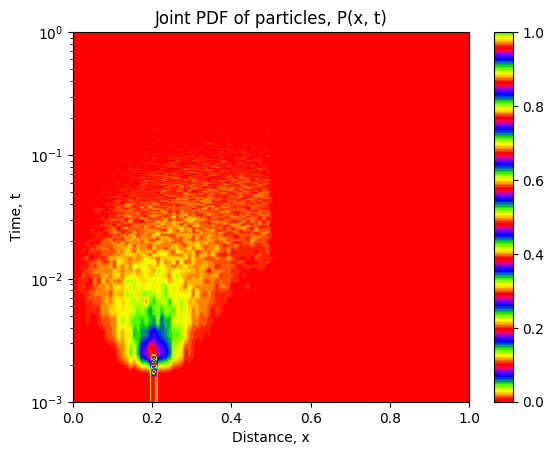

In [567]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#Miscelleneous

Mean First Passage Time =  70.11567567567567


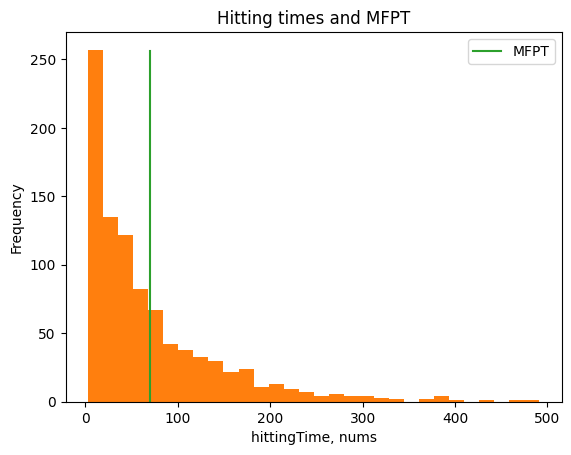

In [568]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.show()
#plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_10_1.png')

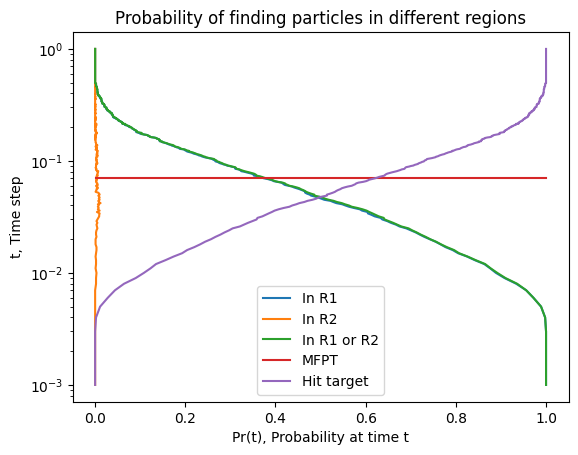

In [569]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("t, Time step")
plt.xlabel("Pr(t), Probability at time t")
plt.title("Probability of finding particles in different regions")
#plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_10_1.png')
plt.show()

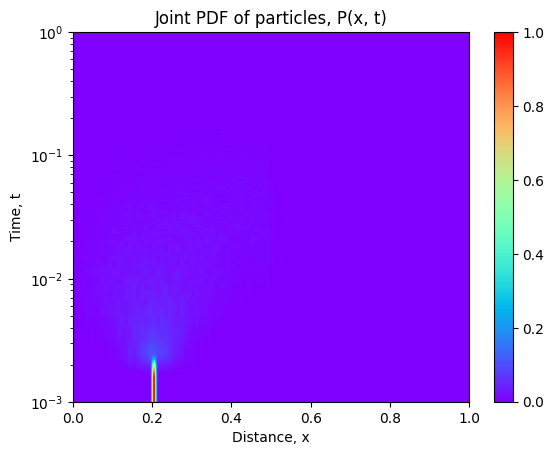

In [570]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'rainbow', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_rainbow.png')

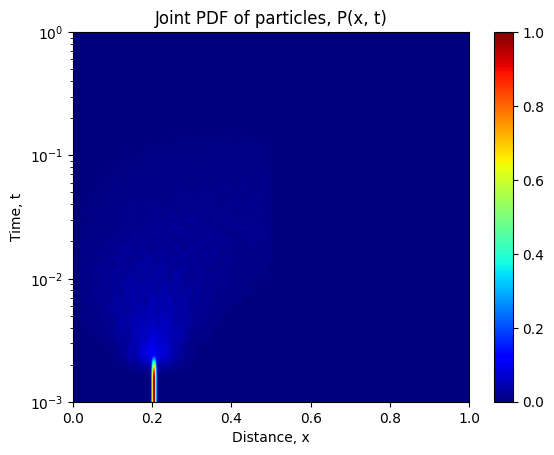

In [571]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'jet', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_jet.png')

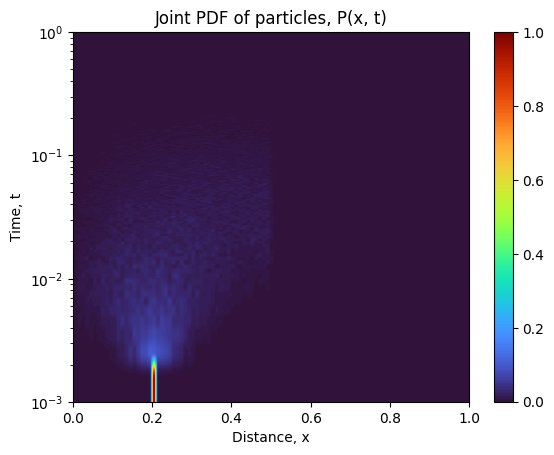

In [572]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'turbo', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_turbo.png')

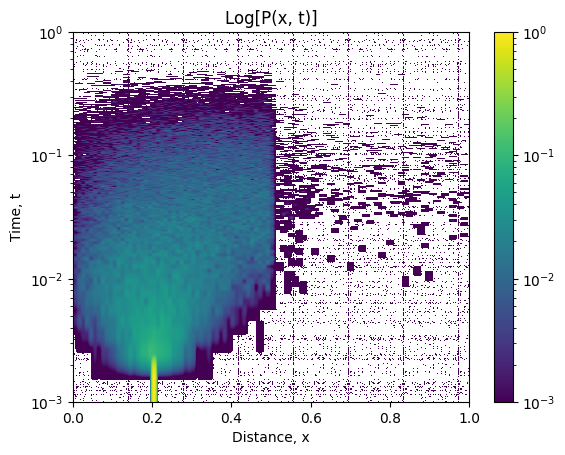

In [573]:
#Plot the heatmap of log of pdf
plt.title("Log[P(x, t)]")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), extent = [0, 1, dt, dt*nums], aspect = "auto", norm='log')
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_Log.png')

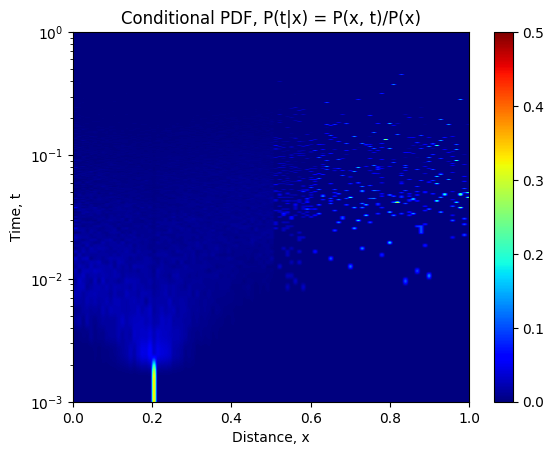

In [574]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(t|x) = P(x, t)/P(x)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[:, p])


#Plot the heatmap of pdf
plt.title("Conditional PDF, P(t|x) = P(x, t)/P(x)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap= 'jet')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_jet.png')

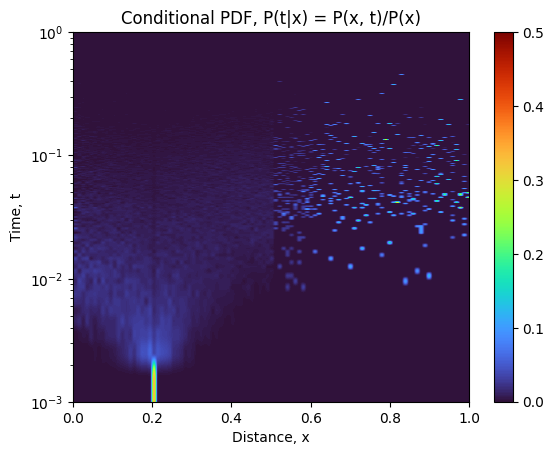

In [575]:
#Plot the heatmap of pdf
plt.title("Conditional PDF, P(t|x) = P(x, t)/P(x)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap= 'turbo')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_turbo.png')

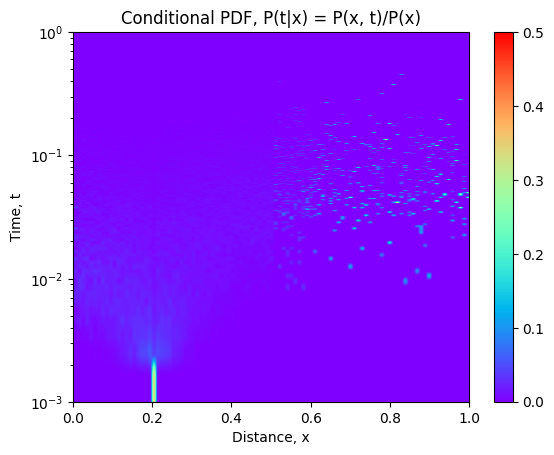

In [576]:
#Plot the heatmap of pdf
plt.title("Conditional PDF, P(t|x) = P(x, t)/P(x)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap= 'rainbow')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_rainbow.png')

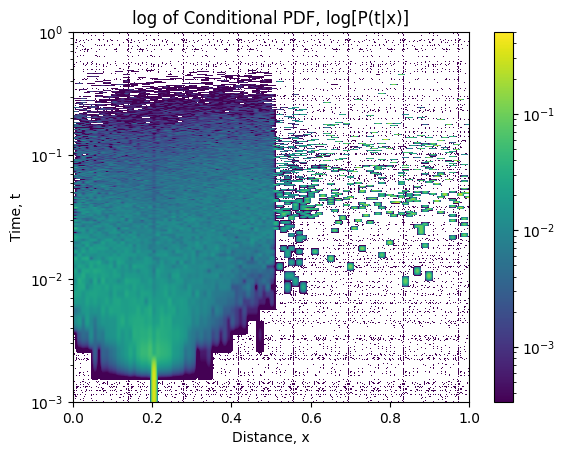

In [577]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(t|x) = P(x, t)/P(x)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[:, p])


#Plot the heatmap of pdf
plt.title("log of Conditional PDF, log[P(t|x)]")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", norm= 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_log.png')

<ipython-input-578-62d35e88ebd5>:9: RuntimeWarning: invalid value encountered in double_scalars
  condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[t, :])


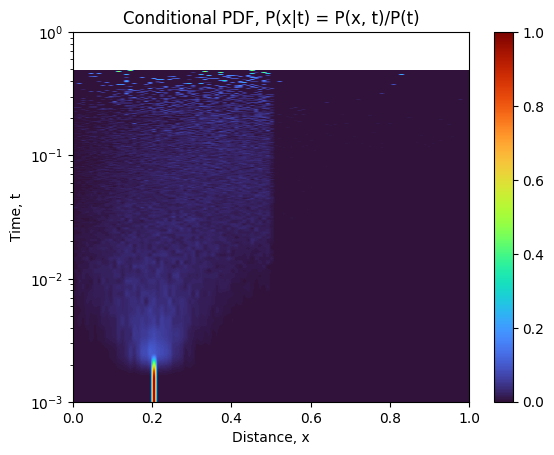

In [578]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(x|t) = P(x, t)/P(t)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[t, :])


#Plot the heatmap of pdf
plt.title("Conditional PDF, P(x|t) = P(x, t)/P(t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'turbo')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_turbo.png')

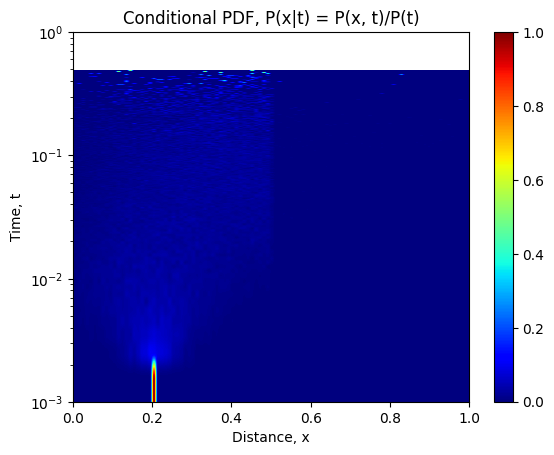

In [579]:
#Plot the heatmap of pdf
plt.title("Conditional PDF, P(x|t) = P(x, t)/P(t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'jet')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_jet.png')

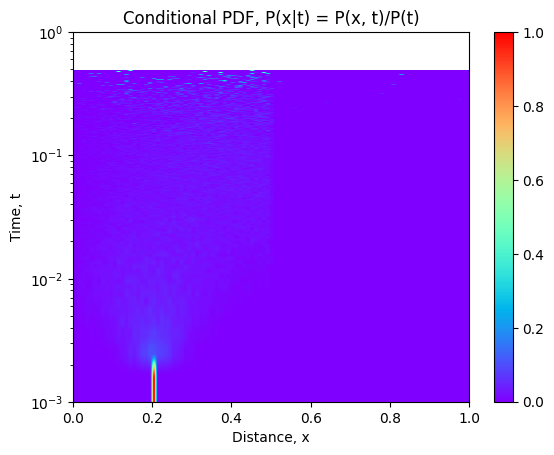

In [580]:
#Plot the heatmap of pdf
plt.title("Conditional PDF, P(x|t) = P(x, t)/P(t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'rainbow')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_rainbow.png')

<ipython-input-581-4cdd763a6b7c>:9: RuntimeWarning: invalid value encountered in double_scalars
  condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[t, :])


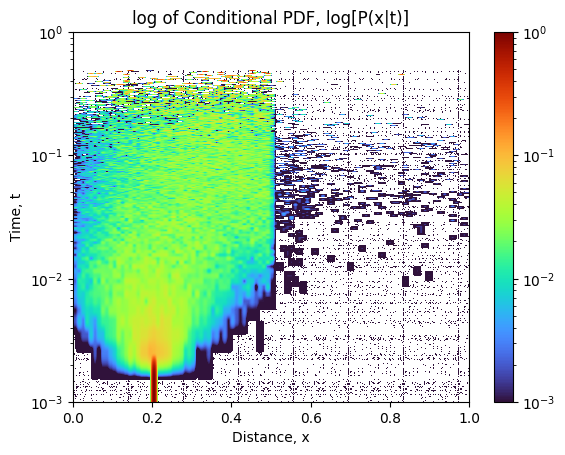

In [581]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(x|t) = P(x, t)/P(t)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[t, :])


#Plot the heatmap of pdf
plt.title("log of Conditional PDF, log[P(x|t)]")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'turbo', norm = 'log')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_log.png')

https://stackoverflow.com/questions/18266642/multiple-imshow-subplots-each-with-colorbar